# Tugas 3 dan 4
Laporan

## Load Library 

In [1]:
import numpy as np
import pandas as pd 
from scipy import stats 

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

from yellowbrick.regressor import PredictionError, ResidualsPlot

## Load Dataset

In [2]:
raw_data = pd.read_csv ("./dataset/house-prices-advanced-regression-techniques/train.csv")

In [3]:
test_data = pd.read_csv ("./dataset/house-prices-advanced-regression-techniques/test.csv")

## Data Inspection

**Lihat Sebagian dari Dataset**

In [4]:
raw_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
#cek struktur data 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
raw_data.shape

(1460, 81)

**Cek Summary dari Data**

In [7]:
raw_data.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


**Cek Metadata**

In [8]:
with open ('./dataset/house-prices-advanced-regression-techniques/data_description.txt','r') as f:
    text = f.readlines()

for meta in text:
    print(meta)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

**Membuang Kolom yang Tidak Representatif dan Ubah Tipe Data**

In [9]:
#membuang kolom Id
raw_data = raw_data.drop(columns='Id') 

#mengubah tipe data 
raw_data['MSSubClass'] = raw_data['MSSubClass'].astype('object') 

#mengecek kembali
raw_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [10]:
#opsi untuk menunjukan semua kolom pada tabel 
#pd.set_option('display.max_columns', None)

#opsi untuk menunjukan semua row pada tabel 
#pd.set_option('display.max_row', None)

**Cek Data yang Hilang pada Kedua Dataset**

In [11]:
#sel hilang pada raw_data
raw_data.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
GarageYrBlt        81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice           0
OverallCond         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [12]:
#sel hilang pada test_data 
test_data.isna().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
LotFrontage       227
GarageCond         78
GarageQual         78
GarageYrBlt        78
GarageFinish       78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
MasVnrType         16
MasVnrArea         15
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF2          1
BsmtFinSF1          1
Exterior2nd         1
BsmtUnfSF           1
TotalBsmtSF         1
SaleType            1
Exterior1st         1
                 ... 
OverallQual         0
SaleCondition       0
Heating             0
ExterQual           0
TotRmsAbvGrd        0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive

## Cek Distribusi Data 

**Cek Distribusi Variabel Target**

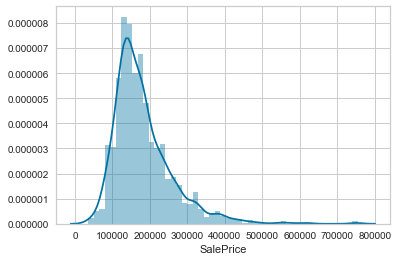

In [13]:
sns.distplot(raw_data['SalePrice']);

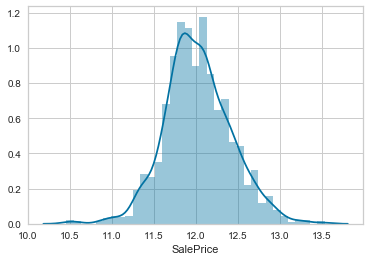

In [14]:
#hasil transform 
hasil_transform = np.log(raw_data['SalePrice'])
sns.distplot(hasil_transform)

/Users/efefer/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


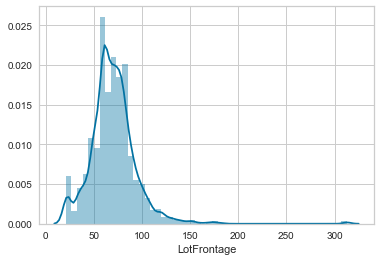

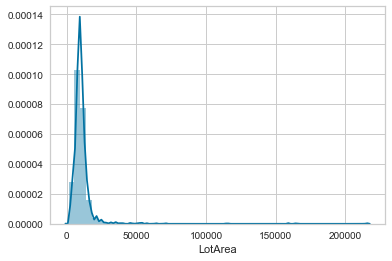

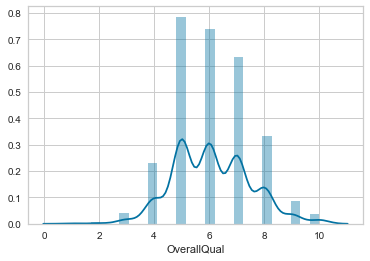

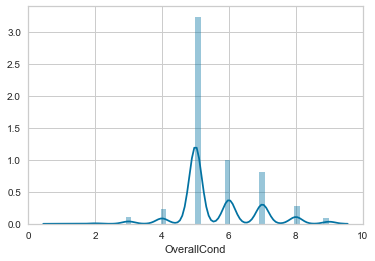

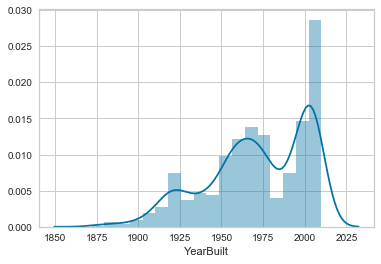

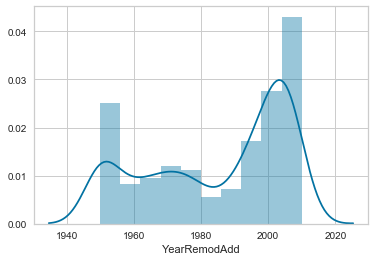

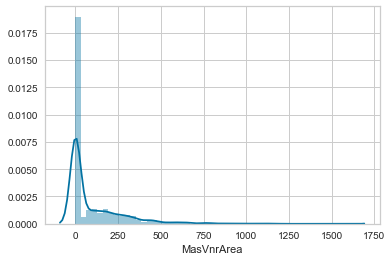

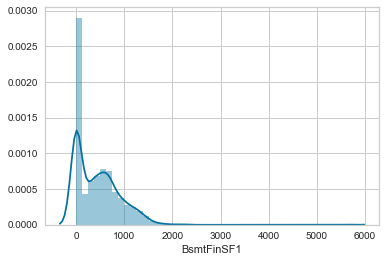

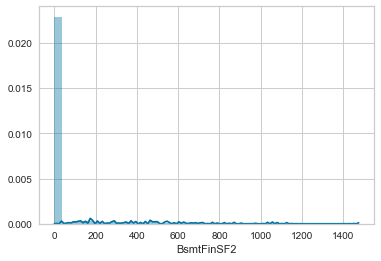

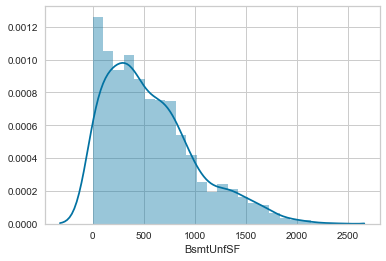

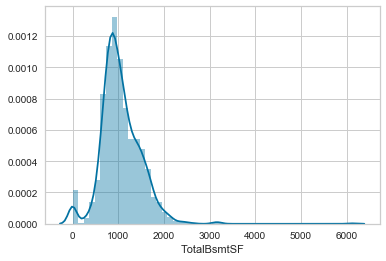

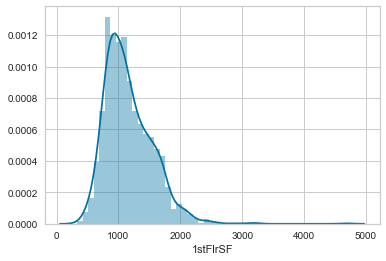

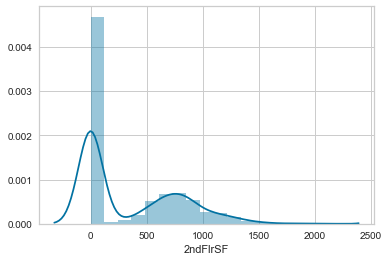

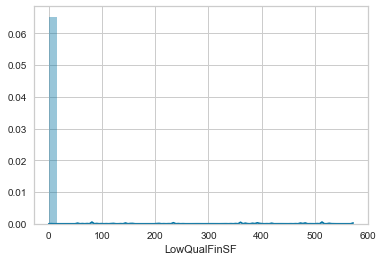

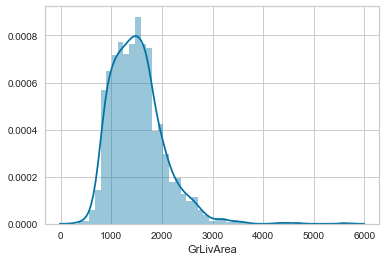

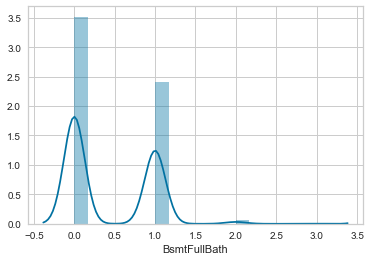

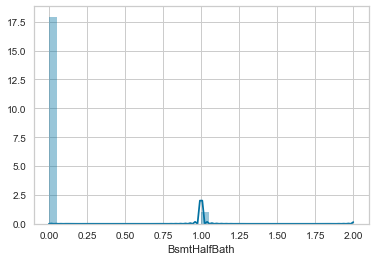

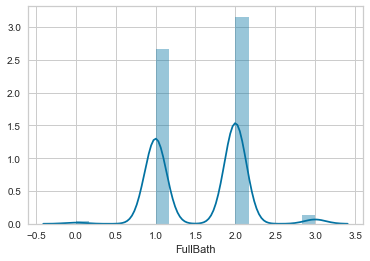

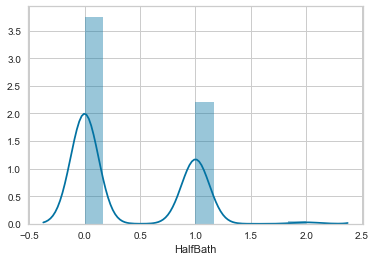

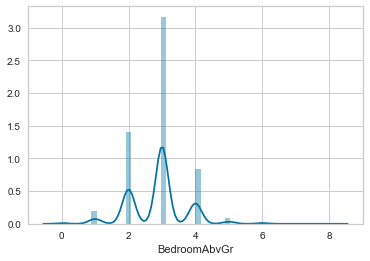

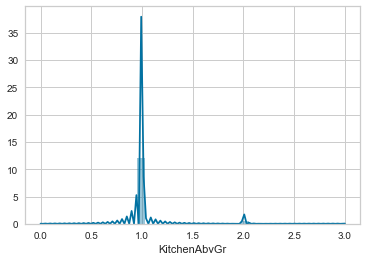

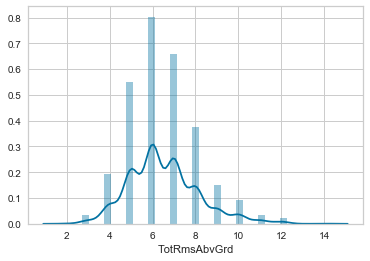

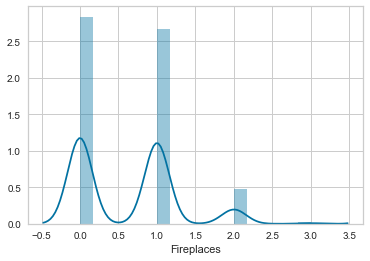

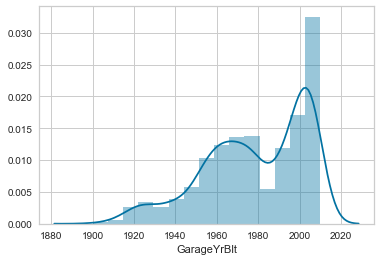

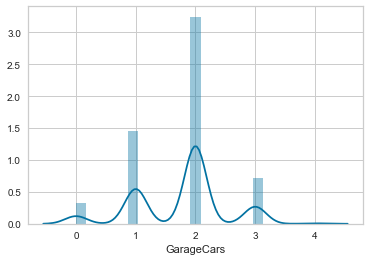

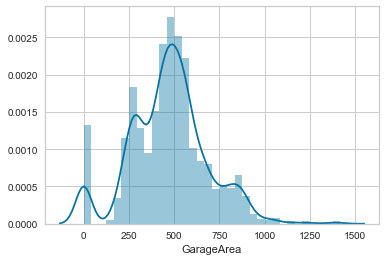

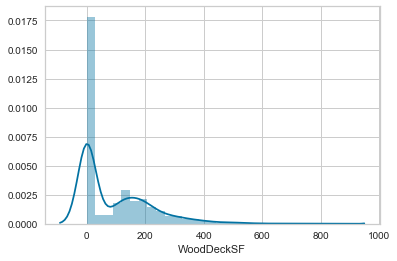

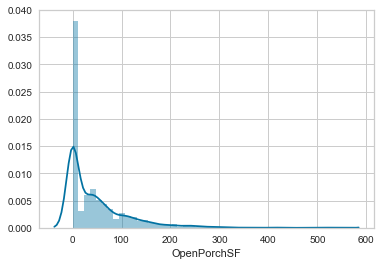

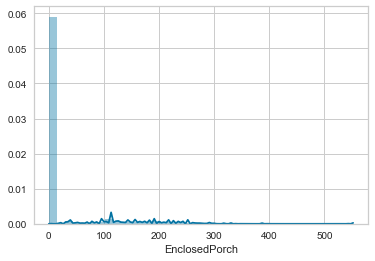

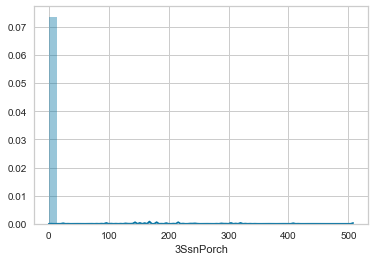

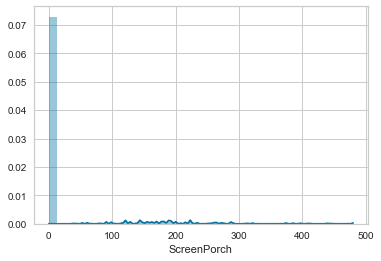

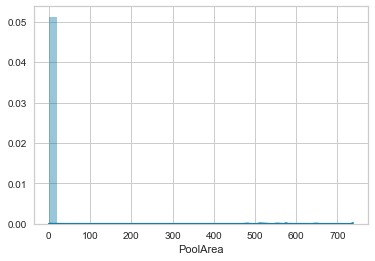

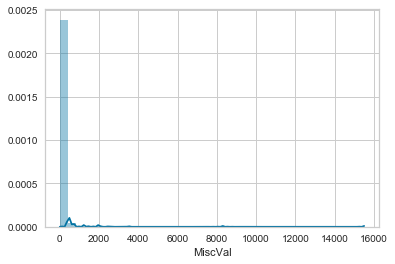

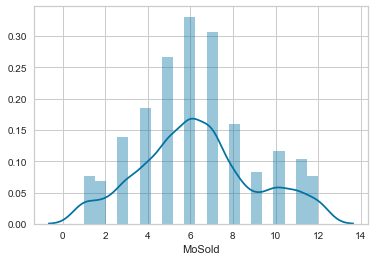

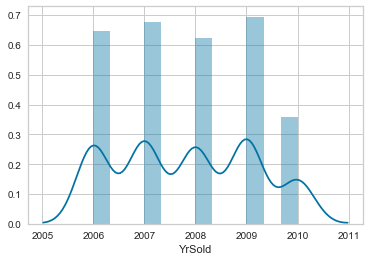

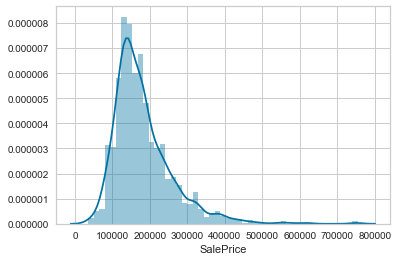

<Figure size 432x288 with 0 Axes>

In [15]:
#mengecek distribusi data numerik lainya 
kolom_numerik = raw_data.select_dtypes('number').columns

for kolom in kolom_numerik:
    sns.distplot(raw_data[kolom].dropna())
    plt.figure()

## Imputasi Data 

**Imputasi Data Bertipe Objek**

In [16]:
#memasukan nilai kolom yang memiliki nilai NA/NaN
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

#ganti nilai NA/NaN dengan 'NotAvail'
for col in cols_fillna:
    raw_data[col].fillna('NotAvail', inplace=True)
    test_data[col].fillna('NotAvail', inplace=True)

In [17]:
# cek observasi yang hilang untuk setiap objek 
raw_data.select_dtypes('object').isna().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

**Imputasi Data Bertipe Numerik**

In [18]:
#imputasi data numerik 
raw_data.select_dtypes('number').isna().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
BsmtUnfSF          0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtFinSF2         0
BsmtHalfBath       0
BsmtFinSF1         0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
BsmtFullBath       0
SalePrice          0
YrSold             0
OpenPorchSF        0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
WoodDeckSF         0
HalfBath           0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
FullBath           0
dtype: int64

**Imputasi Data untuk LotFrontage**

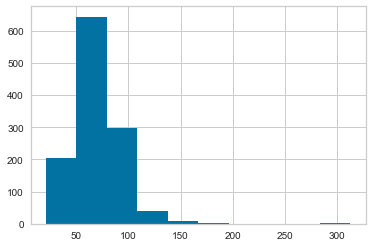

In [19]:
raw_data['LotFrontage'].hist()

In [20]:
#imputasi data dengan median karena data skew ke kanan 
raw_data['LotFrontage'] = raw_data['LotFrontage'].fillna(raw_data['LotFrontage'].median(skipna=True))

**Imputasi Data untuk GarageYrBlt**

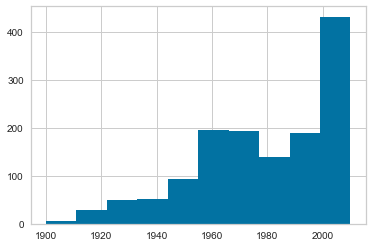

In [21]:
#cek distribusi data
raw_data['GarageYrBlt'].hist()

In [22]:
#cek kaitan antara GarageYrBlt 
raw_data[['GarageYrBlt', 'GarageType']][raw_data['GarageYrBlt'].isnull()]

,GarageYrBlt,GarageType
39,NaN,NotAvail
48,NaN,NotAvail
78,NaN,NotAvail
88,NaN,NotAvail
89,NaN,NotAvail
99,NaN,NotAvail
108,NaN,NotAvail
125,NaN,NotAvail
127,NaN,NotAvail
140,NaN,NotAvail


In [23]:
#imputasi MasVnrArea dengan 0 
raw_data['MasVnrArea'] = raw_data['MasVnrArea'].fillna(0)

In [24]:
#cek data numerik
raw_data.select_dtypes('number').isna().sum()

LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

## Feature Engineering

### Feature Selection Berdasarkan Skewness

**Cek skewness untuk masing-masing Feature**

In [25]:
raw_data.select_dtypes('number').skew().abs()

LotFrontage       2.409147
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt         0.613461
YearRemodAdd      0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt       0.649415
GarageCars        0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
dtype: float64

**Cek Korelasi Tiap Kolom Numerik dengan Variabel Target**

In [26]:
raw_data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [27]:
#buat data copy dari data raw_data
copied_data = raw_data.copy()

#cek skewness
data_after_log = np.log(copied_data.select_dtypes('number') + 1).skew().abs()

#lihat data skew
data_after_log

LotFrontage       0.870006
LotArea           0.137404
OverallQual       0.590977
OverallCond       0.254015
YearBuilt         0.641129
YearRemodAdd      0.511005
MasVnrArea        0.503532
BsmtFinSF1        0.618410
BsmtFinSF2        2.523694
BsmtUnfSF         2.186504
TotalBsmtSF       5.154670
1stFlrSF          0.080114
2ndFlrSF          0.289643
LowQualFinSF      7.460317
GrLivArea         0.006140
BsmtFullBath      0.419213
BsmtHalfBath      3.933064
FullBath          0.394635
HalfBath          0.566168
BedroomAbvGr      1.233677
KitchenAbvGr      3.869414
TotRmsAbvGrd      0.058258
Fireplaces        0.182083
GarageYrBlt       0.671417
GarageCars        1.370219
GarageArea        3.482604
WoodDeckSF        0.153537
OpenPorchSF       0.023397
EnclosedPorch     2.112275
3SsnPorch         7.734975
ScreenPorch       3.150409
PoolArea         14.363102
MiscVal           5.170704
MoSold            0.913424
YrSold            0.095475
SalePrice         0.121347
dtype: float64

**Bandingkan dengan Field sebelum Log-Transform** 

In [28]:
#ambil indeks dari copy data 
indeks = np.log(copied_data.select_dtypes('number') + 1).skew().abs().index

#masukan hasil data sebelum di transform
data_before_log = raw_data.select_dtypes('number').skew().abs()

#buat dalam bentuk dataframe
pembanding = pd.DataFrame({
    "after_log": data_after_log,
    "before_log": data_before_log
}).set_index(indeks)

#cek data perbandingan
pembanding

,after_log,before_log
LotFrontage,0.870006,2.409147
LotArea,0.137404,12.207688
OverallQual,0.590977,0.216944
OverallCond,0.254015,0.693067
YearBuilt,0.641129,0.613461
YearRemodAdd,0.511005,0.503562
MasVnrArea,0.503532,2.677616
BsmtFinSF1,0.618410,1.685503
BsmtFinSF2,2.523694,4.255261
BsmtUnfSF,2.186504,0.920268


In [29]:
#buat container untuk kolom hasil transformasi 
kolom_transformasi = []

#untuk tiap variabel dan nilai pada dataframe tersebut 
for variabel, nilai in zip(indeks, pembanding.values):
    #jika hasil transformasi lebih baik dari nilai sebelumnya 
    if nilai[0]<nilai[1]:
        print("Transformsi", variabel)
        #simpan nama kolom tersebut
        kolom_transformasi.append(variabel)
    else:
        print("Jangan Transformasi", variabel)

Transformsi LotFrontage
Transformsi LotArea
Jangan Transformasi OverallQual
Transformsi OverallCond
Jangan Transformasi YearBuilt
Jangan Transformasi YearRemodAdd
Transformsi MasVnrArea
Transformsi BsmtFinSF1
Transformsi BsmtFinSF2
Jangan Transformasi BsmtUnfSF
Jangan Transformasi TotalBsmtSF
Transformsi 1stFlrSF
Transformsi 2ndFlrSF
Transformsi LowQualFinSF
Transformsi GrLivArea
Transformsi BsmtFullBath
Transformsi BsmtHalfBath
Jangan Transformasi FullBath
Transformsi HalfBath
Jangan Transformasi BedroomAbvGr
Transformsi KitchenAbvGr
Transformsi TotRmsAbvGrd
Transformsi Fireplaces
Jangan Transformasi GarageYrBlt
Jangan Transformasi GarageCars
Jangan Transformasi GarageArea
Transformsi WoodDeckSF
Transformsi OpenPorchSF
Transformsi EnclosedPorch
Transformsi 3SsnPorch
Transformsi ScreenPorch
Transformsi PoolArea
Transformsi MiscVal
Jangan Transformasi MoSold
Transformsi YrSold
Transformsi SalePrice


In [30]:
#kolom yang akan diambil untuk ditransformasi
kolom_transformasi

['LotFrontage',
 'LotArea',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [31]:
#transformasi setiap kolom yang perlu ditransformasi 
for kolom in kolom_transformasi:
    raw_data[kolom] = np.log(raw_data[kolom] + 1)

In [32]:
raw_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.189655,9.042040,Pave,NotAvail,Reg,Lvl,AllPub,Inside,...,0.0,NotAvail,NotAvail,NotAvail,0.000000,2,7.605392,WD,Normal,12.247699
1,20,RL,4.394449,9.169623,Pave,NotAvail,Reg,Lvl,AllPub,FR2,...,0.0,NotAvail,NotAvail,NotAvail,0.000000,5,7.604894,WD,Normal,12.109016
2,60,RL,4.234107,9.328212,Pave,NotAvail,IR1,Lvl,AllPub,Inside,...,0.0,NotAvail,NotAvail,NotAvail,0.000000,9,7.605392,WD,Normal,12.317171
3,70,RL,4.110874,9.164401,Pave,NotAvail,IR1,Lvl,AllPub,Corner,...,0.0,NotAvail,NotAvail,NotAvail,0.000000,2,7.604396,WD,Abnorml,11.849405
4,60,RL,4.442651,9.565284,Pave,NotAvail,IR1,Lvl,AllPub,FR2,...,0.0,NotAvail,NotAvail,NotAvail,0.000000,12,7.605392,WD,Normal,12.429220
5,50,RL,4.454347,9.555064,Pave,NotAvail,IR1,Lvl,AllPub,Inside,...,0.0,NotAvail,MnPrv,Shed,6.552508,10,7.605890,WD,Normal,11.870607
6,20,RL,4.330733,9.218804,Pave,NotAvail,Reg,Lvl,AllPub,Inside,...,0.0,NotAvail,NotAvail,NotAvail,0.000000,8,7.604894,WD,Normal,12.634606
7,60,RL,4.248495,9.247925,Pave,NotAvail,IR1,Lvl,AllPub,Corner,...,0.0,NotAvail,NotAvail,Shed,5.860786,11,7.605890,WD,Normal,12.206078
8,50,RM,3.951244,8.719481,Pave,NotAvail,Reg,Lvl,AllPub,Inside,...,0.0,NotAvail,NotAvail,NotAvail,0.000000,4,7.605392,WD,Abnorml,11.774528
9,190,RL,3.931826,8.912069,Pave,NotAvail,Reg,Lvl,AllPub,Corner,...,0.0,NotAvail,NotAvail,NotAvail,0.000000,1,7.605392,WD,Normal,11.678448


**Cek Korelasi Antara Variabel Prediktor dengan Targetnya**

**Cek Korelasi Antar Variabel Numerik**

In [33]:
raw_data.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.652386,0.205269,-0.027260,0.087589,0.059305,0.116787,0.067373,0.035608,0.140640,...,0.059865,0.133624,-0.021137,0.056284,0.044893,0.119599,0.028491,0.019878,0.004426,0.346237
LotArea,0.652386,1.000000,0.178220,-0.005155,0.021943,0.027672,0.069262,0.096966,0.084312,0.077241,...,0.122915,0.137754,-0.015186,0.055375,0.087518,0.097257,0.080298,0.010518,-0.027164,0.399923
OverallQual,0.205269,0.178220,1.000000,-0.056330,0.572323,0.550684,0.409317,0.054199,-0.101469,0.308159,...,0.283256,0.445101,-0.158648,0.027546,0.049983,0.072651,-0.085131,0.070815,-0.027343,0.817185
OverallCond,-0.027260,-0.005155,-0.056330,1.000000,-0.321931,0.086775,-0.131499,0.056307,0.078993,-0.132069,...,-0.028438,-0.080193,0.076649,0.037606,0.059143,-0.006521,0.073063,-0.005410,0.034887,-0.001794
YearBuilt,0.087589,0.021943,0.572323,-0.321931,1.000000,0.592855,0.407628,0.151209,-0.068793,0.149040,...,0.307474,0.389065,-0.446694,0.028977,-0.059629,0.005805,-0.077819,0.012398,-0.013623,0.586570
YearRemodAdd,0.059305,0.027672,0.550684,0.086775,0.592855,1.000000,0.220650,0.012105,-0.102425,0.181133,...,0.285773,0.382743,-0.226996,0.052398,-0.039983,0.009025,-0.074574,0.021490,0.035754,0.565608
MasVnrArea,0.116787,0.069262,0.409317,-0.131499,0.407628,0.220650,1.000000,0.185368,-0.061345,0.113946,...,0.163106,0.207023,-0.185680,0.047540,0.038658,0.005662,-0.053511,0.018070,-0.002279,0.413318
BsmtFinSF1,0.067373,0.096966,0.054199,0.056307,0.151209,0.012105,0.185368,1.000000,0.185051,-0.584454,...,0.082144,0.015075,-0.127733,0.051775,0.073392,0.042147,0.018808,-0.027153,0.033703,0.208099
BsmtFinSF2,0.035608,0.084312,-0.101469,0.078993,-0.068793,-0.102425,-0.061345,0.185051,1.000000,-0.239884,...,0.059134,-0.077644,0.038587,-0.022537,0.063879,0.068055,0.027978,-0.022430,0.029337,-0.030361
BsmtUnfSF,0.140640,0.077241,0.308159,-0.132069,0.149040,0.181133,0.113946,-0.584454,-0.239884,1.000000,...,0.027254,0.190211,0.000349,0.007747,-0.021033,-0.037018,-0.056029,0.034888,-0.041256,0.221985


**Hanya fokus dengan korelasi variabel numerik lainya dengan variabel target**

In [34]:
#melihat korelasi variabel lainya terhadap SalePrice
raw_data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.730254
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.608955
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.539998
Fireplaces       0.508925
OpenPorchSF      0.459948
MasVnrArea       0.413318
LotArea          0.399923
LotFrontage      0.346237
WoodDeckSF       0.343039
HalfBath         0.320925
BsmtFullBath     0.238945
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
BsmtFinSF1       0.208099
2ndFlrSF         0.180778
ScreenPorch      0.105857
PoolArea         0.069949
3SsnPorch        0.058827
MoSold           0.057330
OverallCond     -0.001794
BsmtHalfBath    -0.004890
BsmtFinSF2      -0.030361
YrSold          -0.037261
LowQualFinSF    -0.054513
MiscVal         -0.067054
KitchenAbvGr    -0.144278
EnclosedPorch   -0.207263
Name: SalePrice, dtype: float64

**Lihat dalam Bentuk lmplot**

<Figure size 432x288 with 0 Axes>

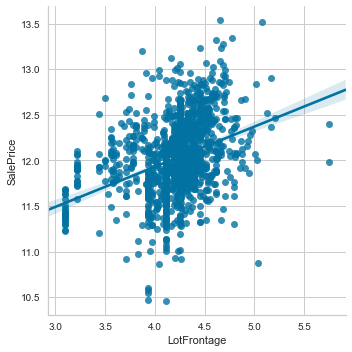

<Figure size 432x288 with 0 Axes>

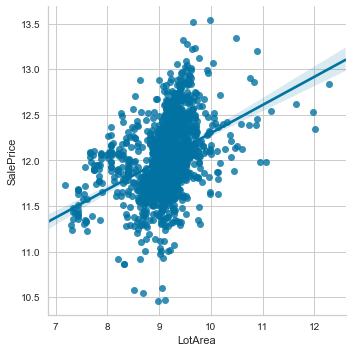

<Figure size 432x288 with 0 Axes>

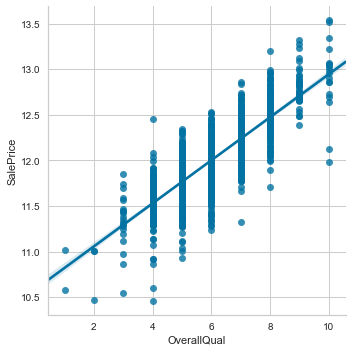

<Figure size 432x288 with 0 Axes>

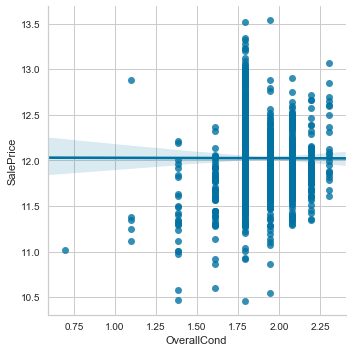

<Figure size 432x288 with 0 Axes>

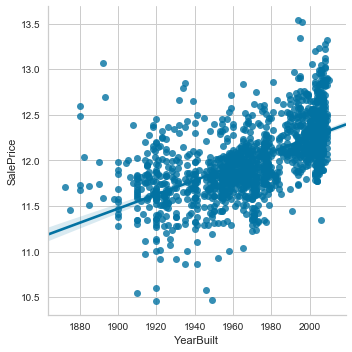

<Figure size 432x288 with 0 Axes>

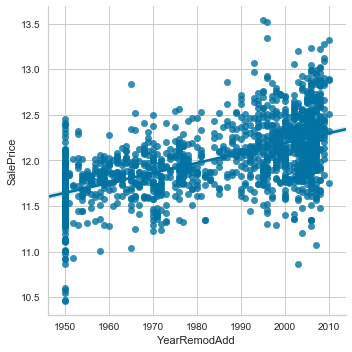

<Figure size 432x288 with 0 Axes>

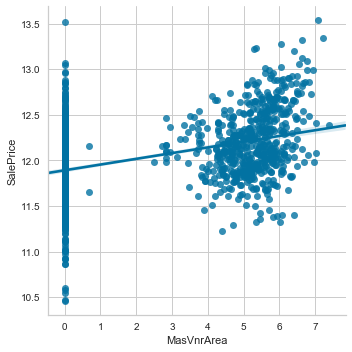

<Figure size 432x288 with 0 Axes>

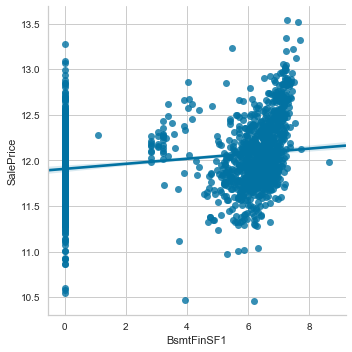

<Figure size 432x288 with 0 Axes>

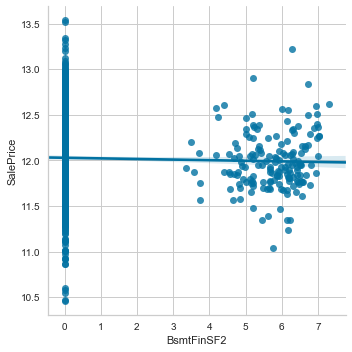

<Figure size 432x288 with 0 Axes>

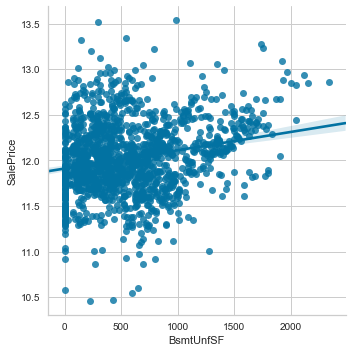

<Figure size 432x288 with 0 Axes>

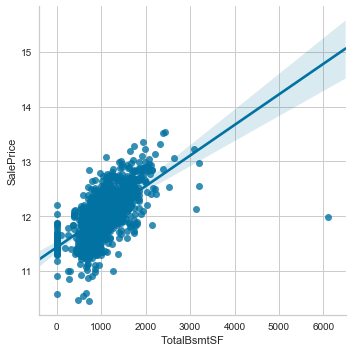

<Figure size 432x288 with 0 Axes>

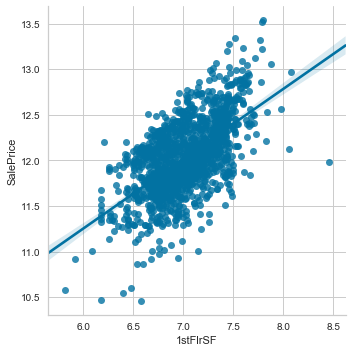

<Figure size 432x288 with 0 Axes>

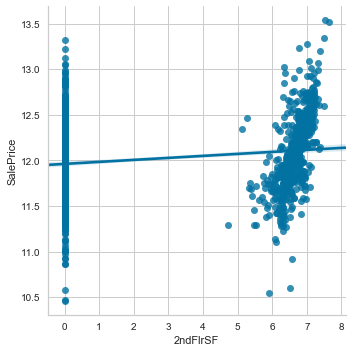

<Figure size 432x288 with 0 Axes>

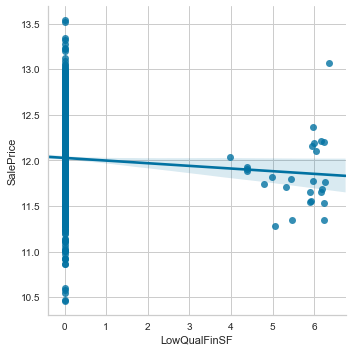

<Figure size 432x288 with 0 Axes>

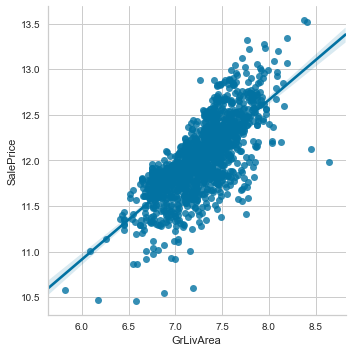

<Figure size 432x288 with 0 Axes>

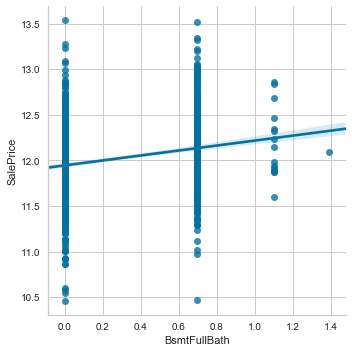

<Figure size 432x288 with 0 Axes>

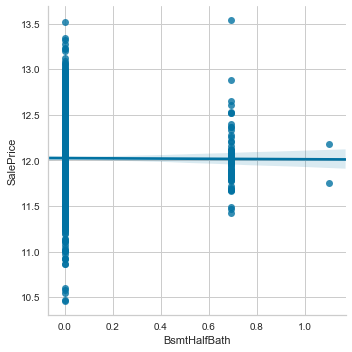

<Figure size 432x288 with 0 Axes>

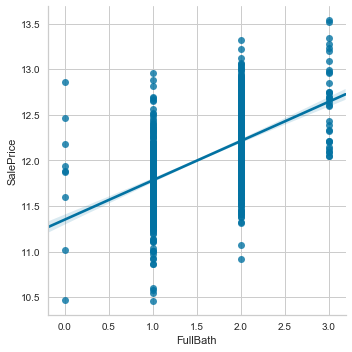

<Figure size 432x288 with 0 Axes>

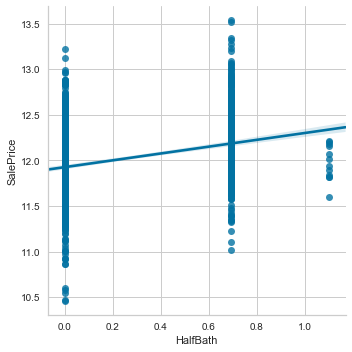

<Figure size 432x288 with 0 Axes>

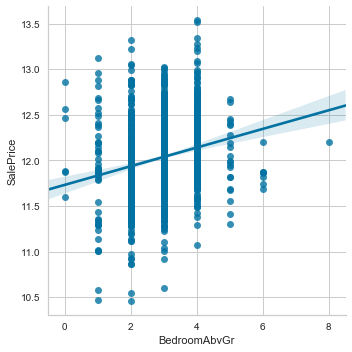

<Figure size 432x288 with 0 Axes>

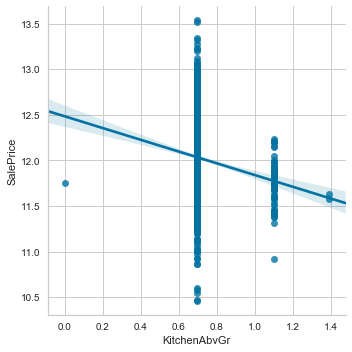

<Figure size 432x288 with 0 Axes>

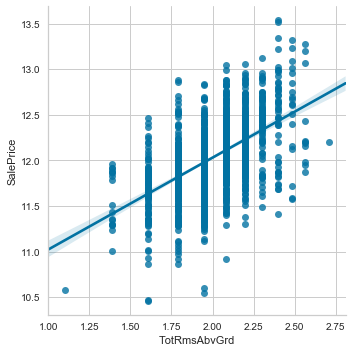

<Figure size 432x288 with 0 Axes>

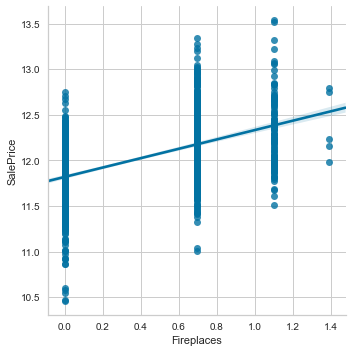

<Figure size 432x288 with 0 Axes>

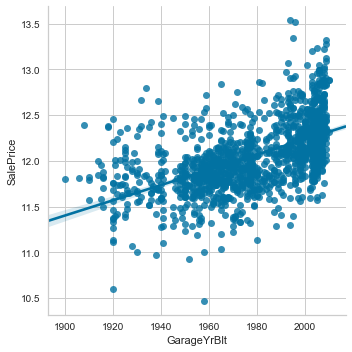

<Figure size 432x288 with 0 Axes>

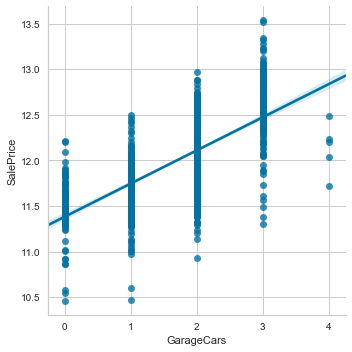

<Figure size 432x288 with 0 Axes>

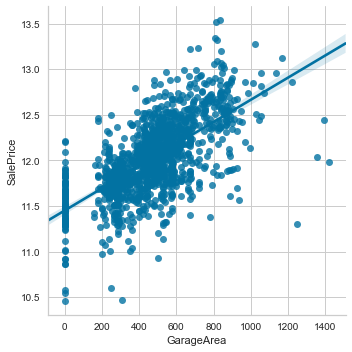

<Figure size 432x288 with 0 Axes>

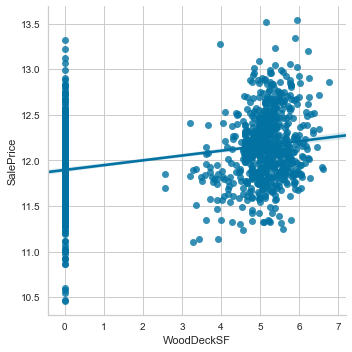

<Figure size 432x288 with 0 Axes>

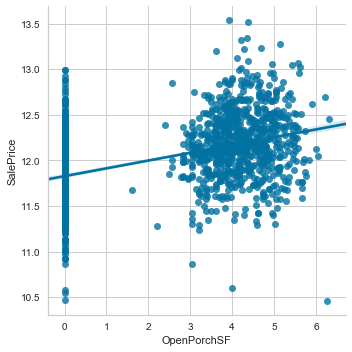

<Figure size 432x288 with 0 Axes>

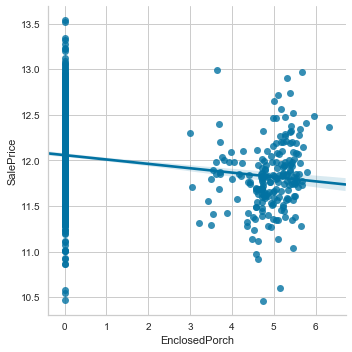

<Figure size 432x288 with 0 Axes>

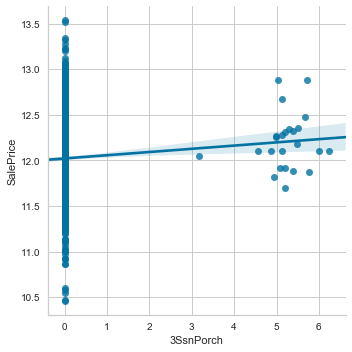

<Figure size 432x288 with 0 Axes>

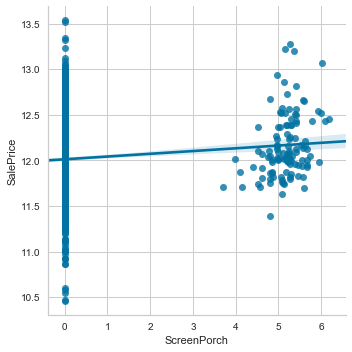

<Figure size 432x288 with 0 Axes>

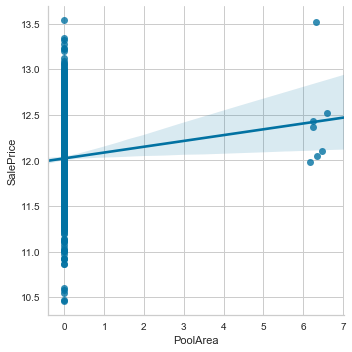

<Figure size 432x288 with 0 Axes>

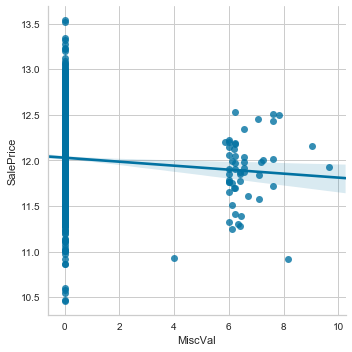

<Figure size 432x288 with 0 Axes>

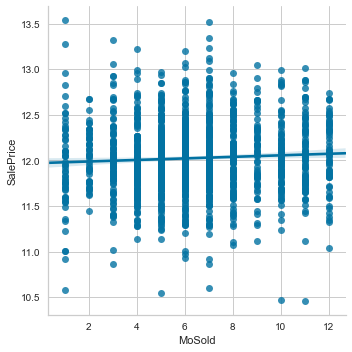

<Figure size 432x288 with 0 Axes>

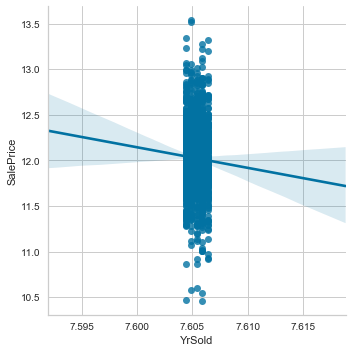

In [35]:
for kolom in kolom_numerik:
    if kolom != 'SalePrice':
        plt.figure()
        sns.lmplot(x=kolom, y='SalePrice', data=raw_data);

**Lakukan Filtering hanya dengan Mengambil yang korelasinya diatas 0.6 terhadap SalePrice**

In [36]:
#ambil nilai korelasi 
nilai_korelasi = raw_data.corr()['SalePrice'].sort_values(ascending=False)

In [37]:
#Buat list untuk menyipan kolom yang memiliki korelasi tinggi dengan variabel target
kolom_korelasi = []

for nama_variabel, korelasi in zip(nilai_korelasi.index, nilai_korelasi.values):
    if np.abs(korelasi) > 0.6:
        print("Ambil kolom", nama_variabel)
        kolom_korelasi.append(nama_variabel)
    else:
        print("kolom", nama_variabel, "tidak diambil")

Ambil kolom SalePrice
Ambil kolom OverallQual
Ambil kolom GrLivArea
Ambil kolom GarageCars
Ambil kolom GarageArea
Ambil kolom TotalBsmtSF
Ambil kolom 1stFlrSF
kolom FullBath tidak diambil
kolom YearBuilt tidak diambil
kolom YearRemodAdd tidak diambil
kolom GarageYrBlt tidak diambil
kolom TotRmsAbvGrd tidak diambil
kolom Fireplaces tidak diambil
kolom OpenPorchSF tidak diambil
kolom MasVnrArea tidak diambil
kolom LotArea tidak diambil
kolom LotFrontage tidak diambil
kolom WoodDeckSF tidak diambil
kolom HalfBath tidak diambil
kolom BsmtFullBath tidak diambil
kolom BsmtUnfSF tidak diambil
kolom BedroomAbvGr tidak diambil
kolom BsmtFinSF1 tidak diambil
kolom 2ndFlrSF tidak diambil
kolom ScreenPorch tidak diambil
kolom PoolArea tidak diambil
kolom 3SsnPorch tidak diambil
kolom MoSold tidak diambil
kolom OverallCond tidak diambil
kolom BsmtHalfBath tidak diambil
kolom BsmtFinSF2 tidak diambil
kolom YrSold tidak diambil
kolom LowQualFinSF tidak diambil
kolom MiscVal tidak diambil
kolom Kitche

In [38]:
kolom_korelasi

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF']

**Cek korelasi antara variabel kategorik dengan variabel target**

In [39]:
#ambil kolom kategorik 
kolom_kategorik = raw_data.select_dtypes('object').columns

#cek kolom kategorik 
kolom_kategorik

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

**Plot dengan BoxPlot**

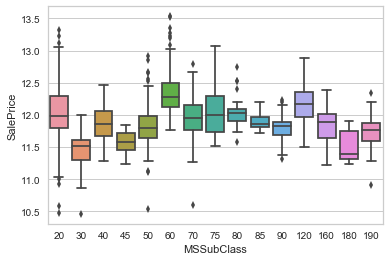

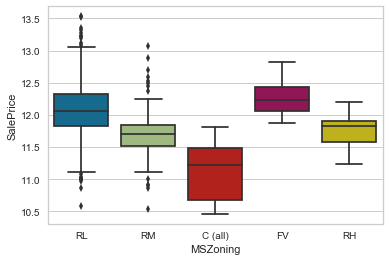

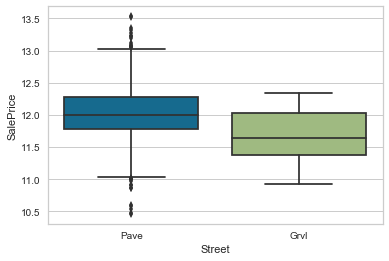

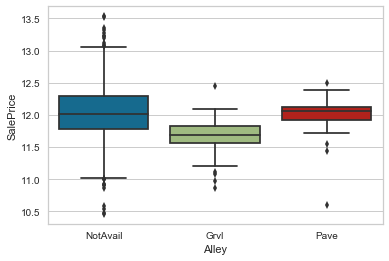

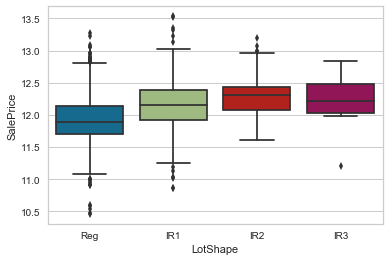

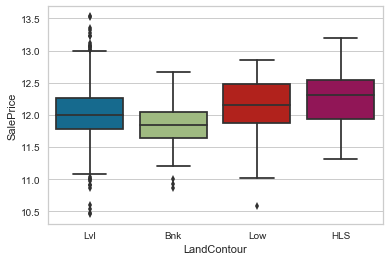

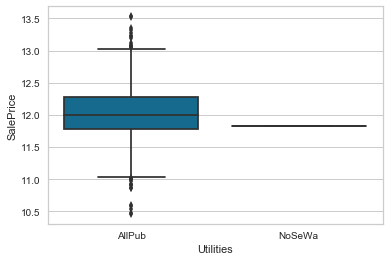

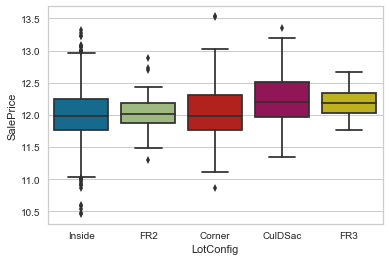

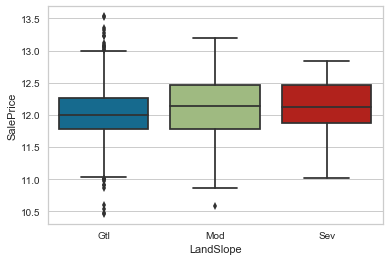

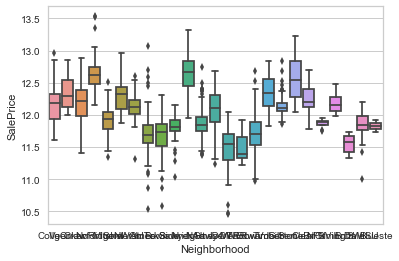

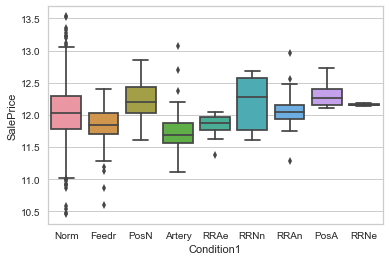

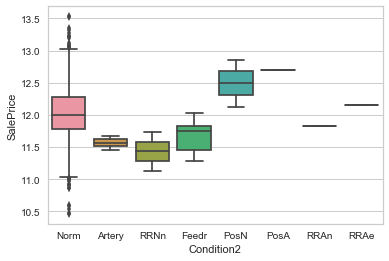

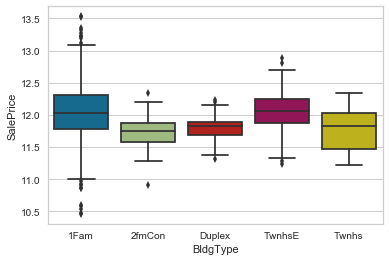

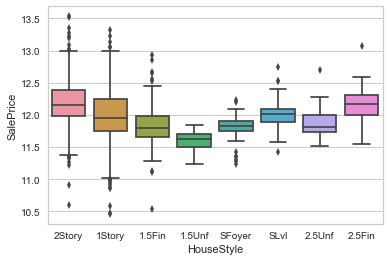

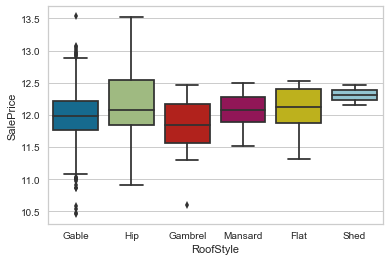

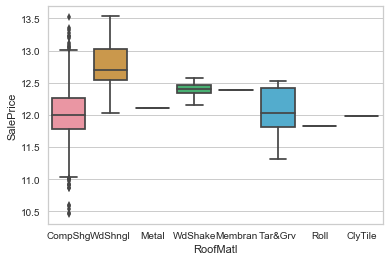

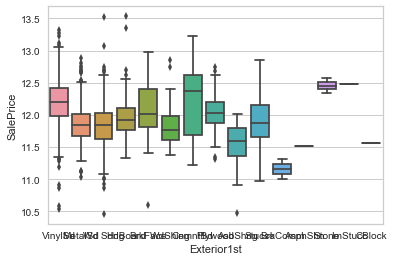

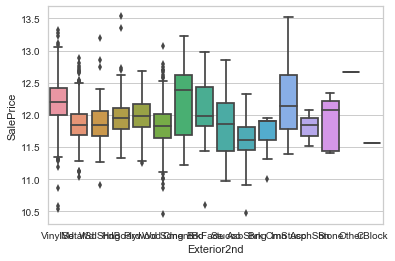

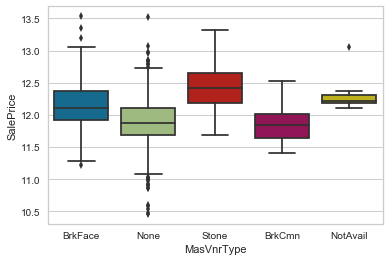

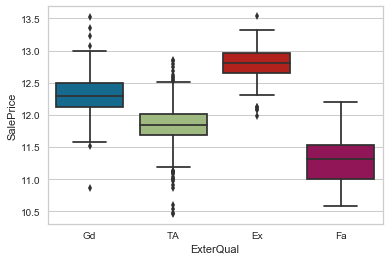

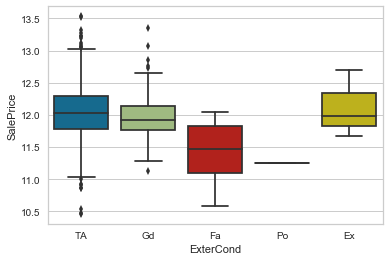

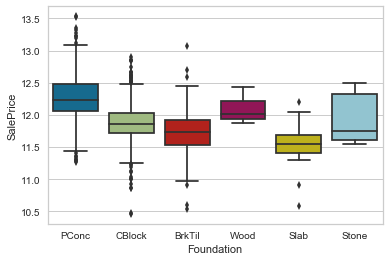

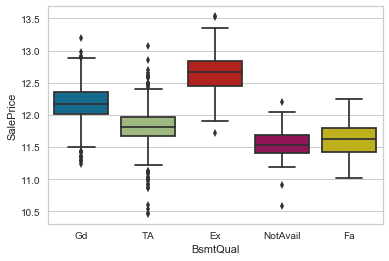

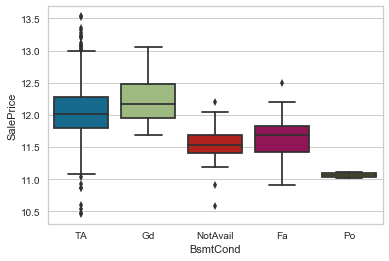

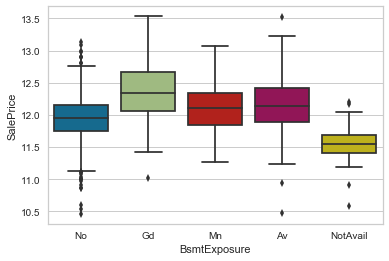

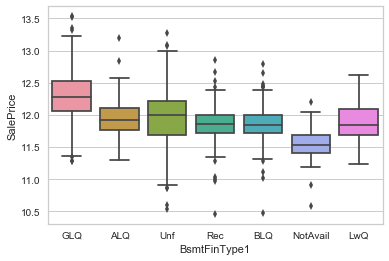

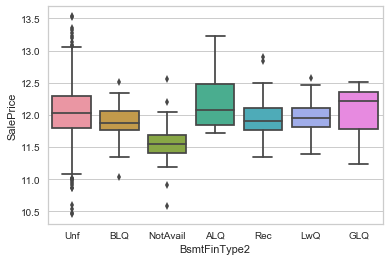

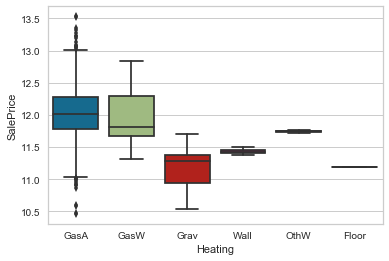

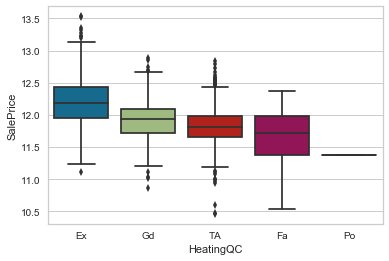

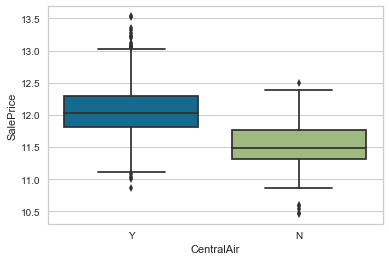

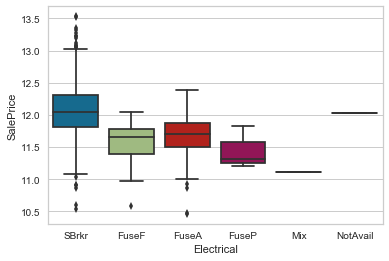

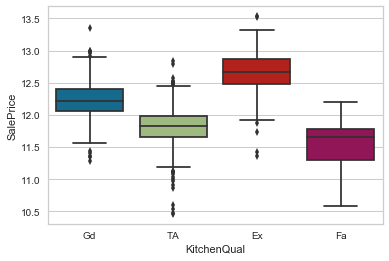

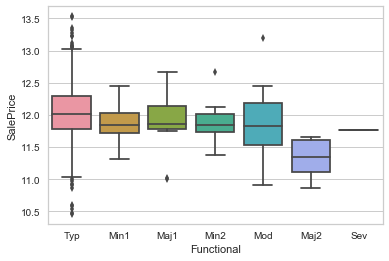

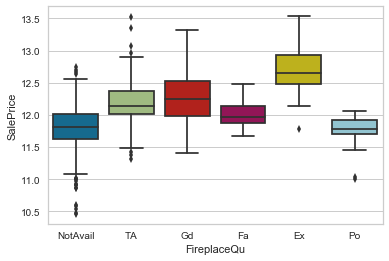

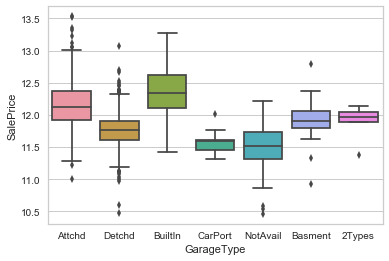

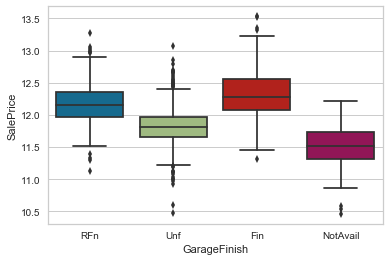

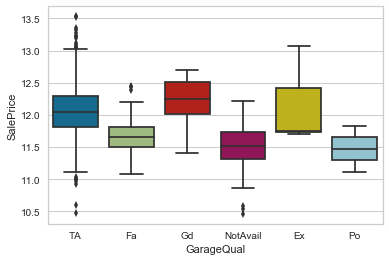

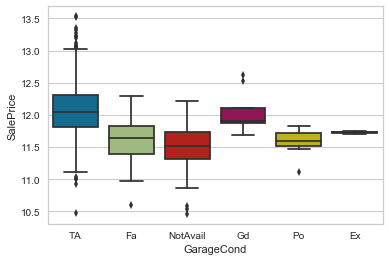

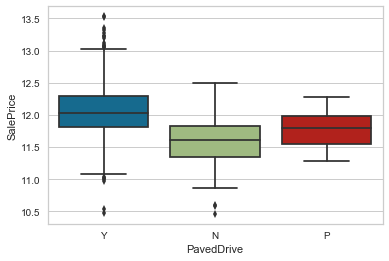

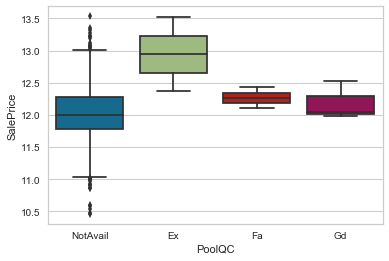

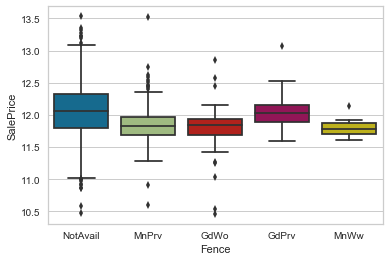

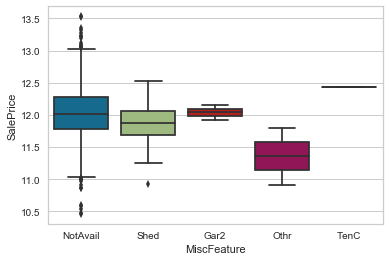

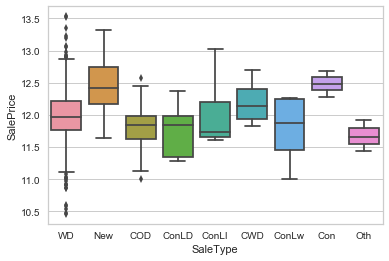

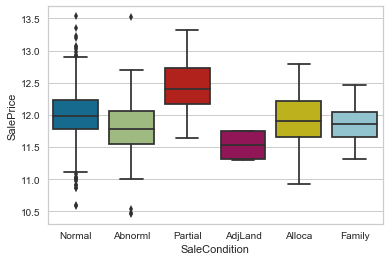

In [40]:
for kolom in kolom_kategorik:
    plt.figure();
    sns.boxplot(x=kolom, y='SalePrice', data=raw_data);

In [41]:
#membuat dummy variables
dummy_variables = pd.get_dummies(raw_data[kolom_kategorik]).copy()

#masukan SalePrice ke dalam kolom dummy_variables
dummy_variables['SalePrice'] = raw_data['SalePrice'].copy()

#cek dummy_variables
dummy_variables

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,12.247699
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,12.109016
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,12.317171
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,11.849405
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,12.429220
5,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,11.870607
6,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,12.634606
7,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,12.206078
8,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,11.774528
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,11.678448


In [42]:
#lihat korelasi tiap item kategori dengan SalePlace
dummy_variables.corr()['SalePrice'].sort_values(ascending=False).abs()

SalePrice                1.000000
Foundation_PConc         0.530840
ExterQual_Gd             0.509675
HeatingQC_Ex             0.466706
BsmtQual_Ex              0.463991
BsmtFinType1_GLQ         0.440764
GarageFinish_Fin         0.418881
GarageType_Attchd        0.415787
KitchenQual_Ex           0.413937
KitchenQual_Gd           0.406601
MSSubClass_60            0.401501
GarageCond_TA            0.365783
ExterQual_Ex             0.356134
Neighborhood_NridgHt     0.351803
CentralAir_Y             0.351599
FireplaceQu_Gd           0.345346
Exterior2nd_VinylSd      0.337444
Exterior1st_VinylSd      0.336138
BsmtQual_Gd              0.334331
GarageQual_TA            0.330476
SaleType_New             0.329190
SaleCondition_Partial    0.324471
MasVnrType_Stone         0.311370
Electrical_SBrkr         0.304861
PavedDrive_Y             0.299959
MSZoning_RL              0.298862
Neighborhood_NoRidge     0.277523
BsmtExposure_Gd          0.270918
HouseStyle_2Story        0.263046
LotShape_IR1  

In [43]:
korelasi_kategorik = dummy_variables.corr()['SalePrice'].sort_values(ascending=False).abs()

for variabel, korelasi in zip(korelasi_kategorik.index, korelasi_kategorik.values):
    if (korelasi > 0.45) & (variabel != 'SalePrice'):
        print("Ambil variabel ", variabel)
        kolom_korelasi.append(variabel)
    else:
        print("Jangan ambil variabel ", variabel)

Jangan ambil variabel  SalePrice
Ambil variabel  Foundation_PConc
Ambil variabel  ExterQual_Gd
Ambil variabel  HeatingQC_Ex
Ambil variabel  BsmtQual_Ex
Jangan ambil variabel  BsmtFinType1_GLQ
Jangan ambil variabel  GarageFinish_Fin
Jangan ambil variabel  GarageType_Attchd
Jangan ambil variabel  KitchenQual_Ex
Jangan ambil variabel  KitchenQual_Gd
Jangan ambil variabel  MSSubClass_60
Jangan ambil variabel  GarageCond_TA
Jangan ambil variabel  ExterQual_Ex
Jangan ambil variabel  Neighborhood_NridgHt
Jangan ambil variabel  CentralAir_Y
Jangan ambil variabel  FireplaceQu_Gd
Jangan ambil variabel  Exterior2nd_VinylSd
Jangan ambil variabel  Exterior1st_VinylSd
Jangan ambil variabel  BsmtQual_Gd
Jangan ambil variabel  GarageQual_TA
Jangan ambil variabel  SaleType_New
Jangan ambil variabel  SaleCondition_Partial
Jangan ambil variabel  MasVnrType_Stone
Jangan ambil variabel  Electrical_SBrkr
Jangan ambil variabel  PavedDrive_Y
Jangan ambil variabel  MSZoning_RL
Jangan ambil variabel  Neighborho

In [44]:
#cek kolom_korelasi 
kolom_korelasi

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'Foundation_PConc',
 'ExterQual_Gd',
 'HeatingQC_Ex',
 'BsmtQual_Ex',
 'BsmtQual_TA',
 'FireplaceQu_NotAvail',
 'KitchenQual_TA',
 'ExterQual_TA']

In [45]:
# buat variabel modeled_dataset yang kolomnya sudah difilter 
# berdasarkan kolom_korelasi
modeled_dataset = pd.get_dummies(raw_data)[kolom_korelasi].copy()

# lihat modeled_dataset
modeled_dataset

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,Foundation_PConc,ExterQual_Gd,HeatingQC_Ex,BsmtQual_Ex,BsmtQual_TA,FireplaceQu_NotAvail,KitchenQual_TA,ExterQual_TA
0,12.247699,7,7.444833,2,548,856,6.753438,1,1,1,0,0,1,0,0
1,12.109016,6,7.141245,2,460,1262,7.141245,0,0,1,0,0,0,1,1
2,12.317171,7,7.488294,2,608,920,6.825460,1,1,1,0,0,0,0,0
3,11.849405,7,7.448916,3,642,756,6.869014,0,0,0,0,1,0,0,1
4,12.429220,8,7.695758,3,836,1145,7.044033,1,1,1,0,0,0,0,0
5,11.870607,5,7.217443,2,480,796,6.680855,0,0,1,0,0,1,1,1
6,12.634606,8,7.435438,2,636,1686,7.435438,1,1,1,1,0,0,0,0
7,12.206078,7,7.645398,2,484,1107,7.010312,0,0,1,0,0,0,1,1
8,11.774528,7,7.481556,2,468,952,6.930495,0,0,0,0,1,0,1,1
9,11.678448,5,6.982863,1,205,991,6.982863,0,0,1,0,1,0,1,1


In [46]:
# buat variabel y
y = modeled_dataset['SalePrice'].values

# buat variabel X
X = modeled_dataset.iloc[:,1:].values

## Modeling 

**Buat Data Training dan Data Validasi**

In [47]:
# train-test split
X_train, X_validation, y_train, y_validation = train_test_split(X,y, test_size=0.2, random_state=1000)

**Pembuatan Model Regresi**

**Modeling**

In [48]:
kolom_korelasi

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'Foundation_PConc',
 'ExterQual_Gd',
 'HeatingQC_Ex',
 'BsmtQual_Ex',
 'BsmtQual_TA',
 'FireplaceQu_NotAvail',
 'KitchenQual_TA',
 'ExterQual_TA']

In [49]:
# buat variabel modeled_dataset yang kolomnya sudah difilter berdasarkan kolom_korelasi
modeled_dataset = pd.get_dummies(raw_data)[kolom_korelasi].copy()

#cek modeled dataset 
modeled_dataset

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,Foundation_PConc,ExterQual_Gd,HeatingQC_Ex,BsmtQual_Ex,BsmtQual_TA,FireplaceQu_NotAvail,KitchenQual_TA,ExterQual_TA
0,12.247699,7,7.444833,2,548,856,6.753438,1,1,1,0,0,1,0,0
1,12.109016,6,7.141245,2,460,1262,7.141245,0,0,1,0,0,0,1,1
2,12.317171,7,7.488294,2,608,920,6.825460,1,1,1,0,0,0,0,0
3,11.849405,7,7.448916,3,642,756,6.869014,0,0,0,0,1,0,0,1
4,12.429220,8,7.695758,3,836,1145,7.044033,1,1,1,0,0,0,0,0
5,11.870607,5,7.217443,2,480,796,6.680855,0,0,1,0,0,1,1,1
6,12.634606,8,7.435438,2,636,1686,7.435438,1,1,1,1,0,0,0,0
7,12.206078,7,7.645398,2,484,1107,7.010312,0,0,1,0,0,0,1,1
8,11.774528,7,7.481556,2,468,952,6.930495,0,0,0,0,1,0,1,1
9,11.678448,5,6.982863,1,205,991,6.982863,0,0,1,0,1,0,1,1


In [50]:
# buat objek LinearRegression
linreg = LinearRegression()

# buat model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
# lihat nilai R^2
linreg.score(X_train, y_train)

0.818910941460649

In [52]:
# membuat prediksi
hasil_prediksi = linreg.predict(X_validation)

# lihat hasil prediksi
hasil_prediksi;

In [53]:
# melihat hasil root mean squared error
np.sqrt(mean_squared_error(y_validation, hasil_prediksi))

0.15488631917417364

## Model Debugging

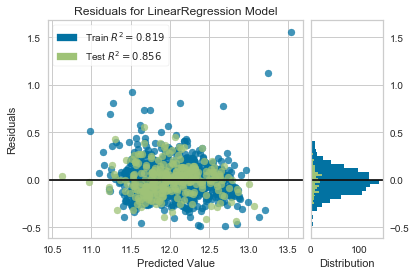

In [54]:
visualizer_residual = ResidualsPlot(linreg)
visualizer_residual.fit(X_train, y_train)
visualizer_residual.score(X_validation, y_validation)
visualizer_residual.finalize();

**Penjelasan**

Perhatikan bahwa sebaran titiknya tidak mengikuti pola kerucut, artinya tidak terdapat heteroskedastisitas pada model. Namun dapat dilihat juga bahwa terdapat titik-titik yang letaknya jauh dari garis. Hal ini membuat distribusi dari residual cenderung skew atau tidak mengikuti bentuk distribusi normal.

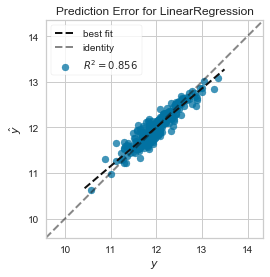

In [55]:
visualizer_prediction_error = PredictionError(linreg)
visualizer_prediction_error.fit(X_train, y_train)
visualizer_prediction_error.score(X_validation, y_validation)
visualizer_prediction_error.finalize();

**Penjelasan**

Antara garis best fit dengan garis identity tidak begitu jauh, sehingga dapat dikatakan bahwa model yang dibuat optimal. 

## Prediksi pada Data Baru

In [56]:
# membuat hasil prediksi untuk test_data

# buang kolom Id
test_data_modeled = test_data.drop(columns='Id').copy()

**Transformasi Semua Kolom Numerik pada test_data_modeled**

In [57]:
# ambil semua kolom yang sama dengan raw_dataset tanpa SalePrice
kolom_transformasi.remove('SalePrice')

# transformasi kolom numerik dengan log-transform
for kolom in kolom_transformasi:
    test_data_modeled[kolom] = np.log1p(test_data_modeled[kolom])

**Lakukan One-Hot Encoding pada test_data_modeled**

In [58]:
# ambil semua kolom yang sama dengan raw_dataset
kolom_korelasi.remove('SalePrice')

test_data_modeled = pd.get_dummies(test_data_modeled)[kolom_korelasi]

In [59]:
test_data_modeled

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,Foundation_PConc,ExterQual_Gd,HeatingQC_Ex,BsmtQual_Ex,BsmtQual_TA,FireplaceQu_NotAvail,KitchenQual_TA,ExterQual_TA
0,5,6.799056,1.0,730.0,882.0,6.799056,0,0,0,0,1,1,1,1
1,6,7.192934,1.0,312.0,1329.0,7.192934,0,0,0,0,1,1,0,1
2,5,7.396335,2.0,482.0,928.0,6.834109,1,0,0,0,0,0,1,1
3,6,7.380879,2.0,470.0,926.0,6.831954,1,0,1,0,1,0,0,1
4,8,7.155396,2.0,506.0,1280.0,7.155396,1,1,1,0,0,1,0,0
5,6,7.412160,2.0,440.0,763.0,6.638568,1,0,0,0,0,0,1,1
6,6,7.080026,2.0,420.0,1168.0,7.080026,1,0,1,0,0,1,1,1
7,6,7.290293,2.0,393.0,789.0,6.672033,1,0,0,0,0,0,1,1
8,7,7.201916,2.0,506.0,1300.0,7.201916,1,0,0,0,0,0,0,1
9,4,6.783325,2.0,525.0,882.0,6.783325,0,0,0,0,1,1,1,1


In [60]:
# cek apakah masih ada data
test_data_modeled.isna().sum().sort_values(ascending=False)

TotalBsmtSF             1
GarageArea              1
GarageCars              1
ExterQual_TA            0
KitchenQual_TA          0
FireplaceQu_NotAvail    0
BsmtQual_TA             0
BsmtQual_Ex             0
HeatingQC_Ex            0
ExterQual_Gd            0
Foundation_PConc        0
1stFlrSF                0
GrLivArea               0
OverallQual             0
dtype: int64

In [61]:
# cek kaitan antara GarageCars dan GarageArea
test_data_modeled[['GarageCars', 'GarageArea']][test_data_modeled['GarageCars'].isna()]

,GarageCars,GarageArea
1116,NaN,NaN


In [62]:
# imputasi pada kolom yang hilang
for kolom in ['GarageCars', 'GarageArea','TotalBsmtSF']:
    if kolom != 'TotalBsmtSF':
        test_data_modeled[kolom] = test_data_modeled[kolom].fillna(0)
    else:
        test_data_modeled[kolom] = test_data_modeled[kolom].fillna(raw_data['TotalBsmtSF'].median(skipna=True))

In [63]:
# cek apakah masih ada data
test_data_modeled.isna().sum().sort_values(ascending=False)

ExterQual_TA            0
KitchenQual_TA          0
FireplaceQu_NotAvail    0
BsmtQual_TA             0
BsmtQual_Ex             0
HeatingQC_Ex            0
ExterQual_Gd            0
Foundation_PConc        0
1stFlrSF                0
TotalBsmtSF             0
GarageArea              0
GarageCars              0
GrLivArea               0
OverallQual             0
dtype: int64

In [64]:
x_test = test_data_modeled.values

In [65]:
hasil_prediksi = linreg.predict(x_test)

In [66]:
# lihat hasil prediksi
hasil_prediksi

array([11.59388182, 11.89648308, 11.95085383, ..., 11.93750737,
       11.55522191, 12.34992549])

**ubah dari nilai log ke nilai sebenarnya**

Inverse dari 

$$y = \log(x + 1)$$

adalah

$$x = e^{y} - 1$$

In [67]:
hasil_prediksi = np.exp(hasil_prediksi) + 1

In [68]:
kaggle_submission = pd.DataFrame({
    "Id": test_data['Id'],
    "SalePrice": hasil_prediksi
})

# lihat hasil kaggle_submission
kaggle_submission

,Id,SalePrice
0,1461,108433.357181
1,1462,146750.609817
2,1463,154950.391027
3,1464,183613.244106
4,1465,210085.168785
5,1466,163975.140182
6,1467,159089.577631
7,1468,158426.870392
8,1469,198533.886509
9,1470,102942.498142


In [69]:
kaggle_submission.to_csv('hasil_prediksi.csv', index=False)

In [70]:
kaggle_submission

,Id,SalePrice
0,1461,108433.357181
1,1462,146750.609817
2,1463,154950.391027
3,1464,183613.244106
4,1465,210085.168785
5,1466,163975.140182
6,1467,159089.577631
7,1468,158426.870392
8,1469,198533.886509
9,1470,102942.498142
